In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("D:/CodeClause_AI_Internship/ROAD_LANE_DETECTION/New folder/Data/test_img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
canny = cv2.Canny(grayimg, 100, 200)

In [7]:
canny = cv2.Canny(grayimg, 100, 200)

In [8]:
roi_vertices = [(270, 670), (600, 400), (1127, 712)]

In [9]:
def roi(image, vertices):
    mask = np.zeros_like(image)
    mask_color = 255
    cv2.fillPoly(mask, vertices, mask_color)
    masked_img = cv2.bitwise_and(image, mask)
    return masked_img

In [10]:
roi_image = roi(canny, np.array([roi_vertices], np.int32))

In [12]:
lines = cv2.HoughLinesP(roi_image, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

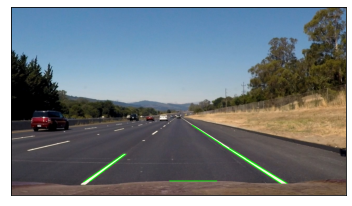

In [13]:
def draw_lines(image, houghlines):
    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0,255,0), 2)
        
    return image

fimg = draw_lines(img, lines)


plt.imshow(fimg)
plt.xticks([])
plt.yticks([])
plt.show()